In [ ]:
import pandas as pd

data = pd.read_csv("user_item_matrix.csv")
user_column = 'user_id'
product_columns = data.columns[1:]

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, user_column].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, user_column].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, user_column].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

co_rating_stats = []
for user in active_users:
    user_data = data[data[user_column] == user]
    if user_data.empty:
        no_common_users = 0
        no_coRated_items = 0
    else:
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]
        no_common_users = co_rated_items[user_column].nunique()
        no_coRated_items = len(user_rated_items)
    co_rating_stats.append([no_common_users, no_coRated_items])

co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])
co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)

print("\nSorted Co-Rating Statistics:")
print(co_rating_df_sorted)


Column names in the dataset: Index(['user_id', 'Guardians of the Galaxy', 'The Avengers', 'Thor: Ragnarok',
       'Iron Man', 'Avengers: Infinity War', 'Hulk', 'Captin America',
       'Black Panther', 'SpiderMan', 'Captin Marvel'],
      dtype='object')
Total number of unique users (tnu): 100
Total number of unique items (tni): 10
Ratings per product:
Guardians of the Galaxy    19
The Avengers               16
Thor: Ragnarok             96
Iron Man                   14
Avengers: Infinity War     18
Hulk                       90
Captin America              4
Black Panther              11
SpiderMan                   3
Captin Marvel               2
dtype: int64
User with 2 missing ratings: ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA']
User with 3 missing ratings: ['AEMJ2EG5ODOCYUTI54NBXZHDJGSQ']
User with 5 missing ratings: ['AFSKPY37N3C43SOI5IEXEK5JSIYA']
Item with 4% missing ratings: Index(['Thor: Ragnarok'], dtype='object')
Item with 10% missing ratings: Index(['Hulk'], dtype='object')


In [ ]:
import pandas as pd

data = pd.read_csv("user_item_matrix.csv")
user_column = 'user_id'
product_columns = data.columns[1:]

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, user_column].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, user_column].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, user_column].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

co_rating_stats = []
for user in active_users:
    user_data = data[data[user_column] == user]
    if user_data.empty:
        no_common_users, no_coRated_items = 0, 0
    else:
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]
        no_common_users = co_rated_items[user_column].nunique()
        no_coRated_items = len(user_rated_items)
    co_rating_stats.append([no_common_users, no_coRated_items])

co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])
co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)

print("\nSorted Co-Rating Statistics:")
print(co_rating_df_sorted)


Sorted Co-Rating Statistics:
   No_common_users  No_coRated_items
0              100                 8
1              100                 7
2               91                 5


In [3]:
import pandas as pd
data = pd.read_csv("user_item_matrix.csv")

user_column = 'user_id'
product_columns = data.columns[1:]

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'user_id'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

co_rating_stats = []

for user in active_users:
    
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
    
        no_common_users = 0
        no_coRated_items = 0
    else:
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]  
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)] 
        no_common_users = co_rated_items[user_column].nunique()  
        no_coRated_items = len(user_rated_items)  
    co_rating_stats.append([no_common_users, no_coRated_items])

co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])


co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)

sorted_array = co_rating_df_sorted.valuess
print("\nSorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):")
print(sorted_array)



Sorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):
[[100   8]
 [100   7]
 [ 91   5]]


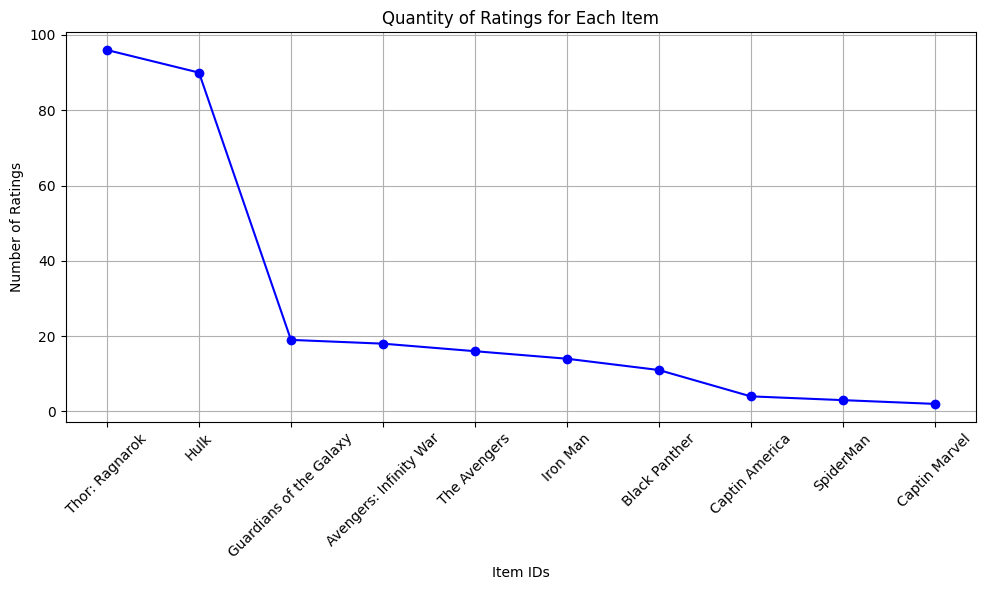

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("user_item_matrix.csv")

# 1. Count the ratings (non-null values) for each item
ratings_count = df.iloc[:, 1:].notnull().sum(axis=0)  # Exclude the user_id column

# 2. Sort the items by the number of ratings (optional)
ratings_count = ratings_count.sort_values(ascending=False)

# 3. Plot the curve (line plot)
plt.figure(figsize=(10, 6))
plt.plot(ratings_count.index, ratings_count.values, marker='o', linestyle='-', color='b')
plt.title('Quantity of Ratings for Each Item')
plt.xlabel('Item IDs')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv("user_item_matrix.csv")

# Define user and product columns
user_column = 'user_id'
product_columns = data.columns[1:]  # All columns except the first column (user_id)

# Define active users (those with 2, 3, and 5 missing ratings)
missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'user_id'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

# Initialize a dictionary to store the thresholds for each active user
thresholds = {}

# Loop through each active user to calculate the threshold ß
for user in active_users:
    # Filter data for the current active user
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
        thresholds[user] = 0
        continue
    
    # Get items rated by the active user
    user_rated_items = user_data.iloc[0, 1:].dropna().index  # Extract rated items
    
    if user_rated_items.empty:
        thresholds[user] = 0
        continue
    
    # Calculate co-rated items percentage for each user
    co_ratings = []
    for _, other_user_data in data.iterrows():
        if other_user_data[user_column] == user:
            continue
        
        # Find items co-rated with the active user
        other_user_rated_items = other_user_data[user_rated_items].dropna()
        co_rated_count = len(other_user_rated_items)
        
        # Calculate the percentage of co-rated items
        total_items_rated_by_user = len(user_rated_items)
        if total_items_rated_by_user > 0:
            co_rated_percentage = (co_rated_count / total_items_rated_by_user) * 100
        else:
            co_rated_percentage = 0
        
        # Add to co-ratings list if the percentage meets or exceeds 30%
        if co_rated_percentage >= 30:
            co_ratings.append(other_user_data[user_column])
    
    # Store the maximum number of co-rating users meeting the threshold
    thresholds[user] = len(set(co_ratings))

# Print thresholds for each active user
print("Thresholds (ß) for each active user:")
for user, beta in thresholds.items():
    print(f"User {user}: ß = {beta}")


Thresholds (ß) for each active user:
User AETE7Y3DZT6BLMWA6U27ADJDZ4LA: ß = 52
User AEMJ2EG5ODOCYUTI54NBXZHDJGSQ: ß = 50
User AFSKPY37N3C43SOI5IEXEK5JSIYA: ß = 14


In [6]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset (replace with your actual file path)
user_item_matrix = pd.read_csv("user_item_matrix.csv")

# Strip any leading/trailing spaces in column names
user_item_matrix.columns = user_item_matrix.columns.str.strip()

# Set 'user_id' as the index
user_item_matrix.set_index('user_id', inplace=True)


# List of active users (replace with your actual active users)
active_users = ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA', 'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ', 'AFSKPY37N3C43SOI5IEXEK5JSIYA']

# Filter the matrix for the active users and all other users
user_item_matrix_active = user_item_matrix.loc[active_users + [user for user in user_item_matrix.index if user not in active_users]]

# Compute Cosine Similarity between active users and other users
cosine_sim = cosine_similarity(user_item_matrix_active.fillna(0))

# Print the Cosine Similarity matrix
print("Cosine Similarity Matrix:\n", cosine_sim)

# Extract the similarities for the active users with respect to all other users
for i, user in enumerate(active_users):
    print(f"\nSimilarities of {user} with all other users:")
    similarity_scores = cosine_sim[i]
    similarity_df = pd.DataFrame(similarity_scores, index=user_item_matrix_active.index, columns=['Similarity'])
    print(similarity_df.sort_values(by='Similarity', ascending=False))


Cosine Similarity Matrix:
 [[1.         0.80161343 0.57232262 ... 0.61696353 0.62421024 0.74295879]
 [0.80161343 1.         0.48145555 ... 0.48591266 0.56011203 0.41666667]
 [0.57232262 0.48145555 1.         ... 0.36697309 0.35955873 0.21398025]
 ...
 [0.61696353 0.48591266 0.36697309 ... 1.         0.84051119 0.57166195]
 [0.62421024 0.56011203 0.35955873 ... 0.84051119 1.         0.49009803]
 [0.74295879 0.41666667 0.21398025 ... 0.57166195 0.49009803 1.        ]]

Similarities of AETE7Y3DZT6BLMWA6U27ADJDZ4LA with all other users:
                              Similarity
user_id                                 
AETE7Y3DZT6BLMWA6U27ADJDZ4LA    1.000000
AHE2H77LQCUDXIXFI46LFDCVKJNQ    0.825609
AEMJ2EG5ODOCYUTI54NBXZHDJGSQ    0.801613
AG2UEDPK43QC5AU6HZTCBANPW2FQ    0.792453
AE3TASYGLHHRHUJUDFTKFDMWFIYA    0.778142
...                                  ...
AHIL63TZRABKLCVM22CGMMKZDRXQ    0.383131
AF7J5A2ME55LSCRVQWXB3BKE7CHQ    0.383131
AGV4WWE4CB7LRPPV6PG7RCEFBT3A    0.383131
AEVWAM3YWN